### Project 2
#### Name: Thivian Varnacumaaran
#### Student #:216377624
#### Question to answer 1: Perform a detailed exploratory data analysis on the data set if required

### Table of Contents
* Question to answer 1
* Question to answer 2
* Question to answer 3
* Question to answer 4
* Question to answer 5
* Question to answer 6

#### Question to answer 1: Perform a detailed exploratory data analysis on the data set if required

In [1017]:
###Implement data and read data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

customer= pd.read_csv('C:/Users/Thivian Varna/Desktop/Juypternotebook files/Wholesale customers data.csv')
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [1018]:
###Drop Region and show data again (reason, will skew the data with having limited info)
customer.drop(['Region'], axis=1, inplace=True)

In [1019]:
customer.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


##### EDA using a Scatter Plot

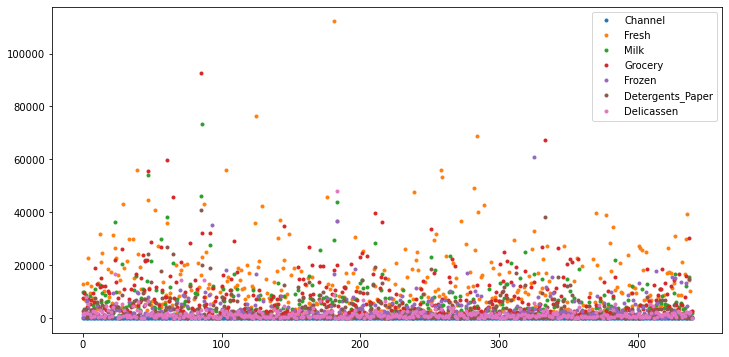

In [1020]:

%matplotlib inline
customer.plot(figsize=(12,6), style='.');

##### EDA using a Correlation Heatmap 

Source: https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/#:~:text=A%20correlation%20heatmap%20is%20a,necessarily%20imply%20a%20causal%20relationship.
https://www.youtube.com/watch?v=UgtjatBt3vY

In [1021]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt


In [1022]:
#set the columns
customer.columns

Index(['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')

In [1023]:
#set the data 
customer=customer[['Channel','Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]
customer.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [1024]:
#set up the correlation and the heatmap
customer.corr()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Fresh,-0.169172,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<AxesSubplot:>

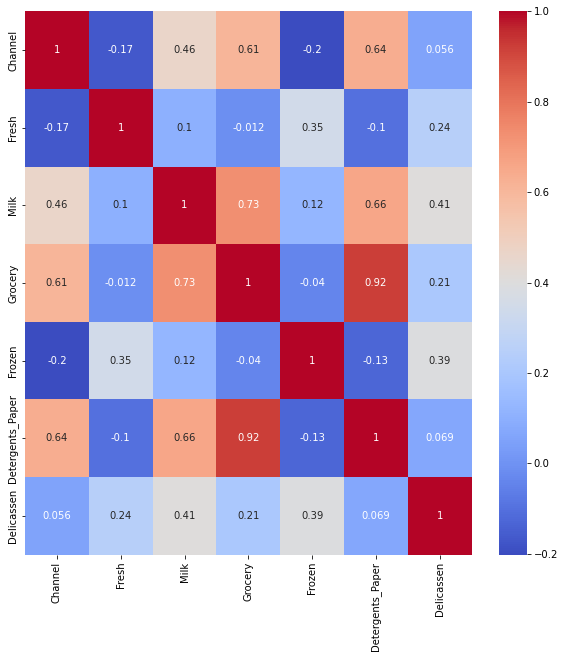

In [1025]:
plt.figure(figsize=(10,10))
seaborn.heatmap(customer.corr(),annot=True, cmap='coolwarm')



<AxesSubplot:>

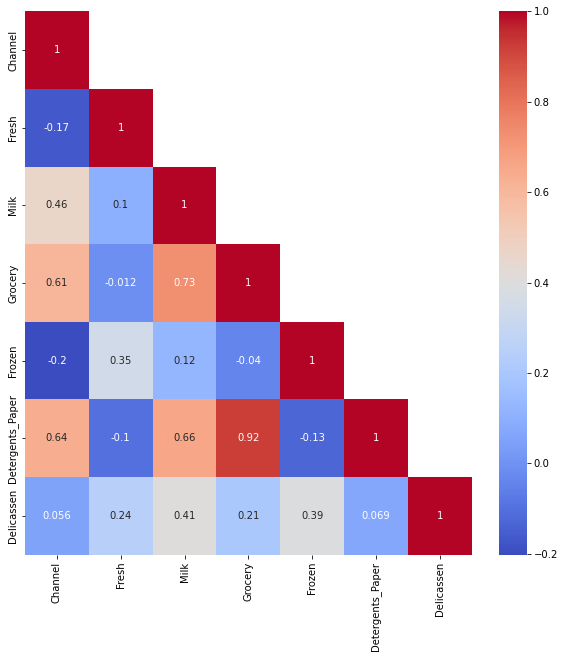

In [1026]:
mask = np.array(customer.corr())
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(10,10))
seaborn.heatmap(customer.corr(), mask=mask, annot=True, cmap='coolwarm')

#### Observation
The eda correlation heatmap shows a better interperation on what corralates with the data. There is a high correlation betweem milk and grocceries with 0.73 

### Question to answer 2: Implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScalerand StandardScaler). Choose one of the Scaler to proceed ahead and provide reasoning as to why it was selected?

In [1027]:
# Set the Libaries 
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

%matplotlib inline

In [1028]:
#set up to store data 
rows = 100
test_data = np.empty((rows,4))
test_data[:,0] = np.random.random(rows) * 2 + 1.5 
test_data[:,1] = np.random.randn(rows)
test_data[:,2] = np.random.randint(-50, 25, rows)/10
test_data[:,3] = np.exp(np.random.random(rows)+1.5)
print(customer[:5])

   Channel  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2  12669  9656     7561     214              2674        1338
1        2   7057  9810     9568    1762              3293        1776
2        2   6353  8808     7684    2405              3516        7844
3        1  13265  1196     4221    6404               507        1788
4        2  22615  5410     7198    3915              1777        5185


In [1029]:
#drop channel and Region and show data 

customer.drop(['Channel'], axis=1, inplace=True)


In [1030]:
customer.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Standard Scaler 

In [1031]:
#remove the mean and scale to unit variance
from sklearn.preprocessing import StandardScaler
customer1 = StandardScaler().fit_transform(customer)
customer1[:5]

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689]])

In [1032]:
pd.DataFrame(customer1).describe().head(3)

,0,1,2,3,4,5
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00


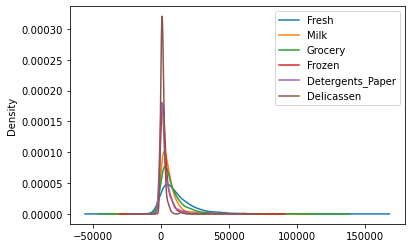

In [1033]:
#graph the data 
pd.DataFrame(customer).plot(kind='kde');

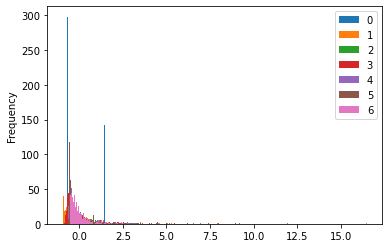

In [1034]:
pd.DataFrame(scaled1).plot(kind='hist', bins=300);

### MinMaxScaler

In [1035]:
#remove the median and scale the data 
from sklearn.preprocessing import MinMaxScaler
customer2 = MinMaxScaler().fit_transform(customer)
customer2[:5]

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861],
       [0.11825445, 0.01553586, 0.04546385, 0.10484189, 0.01234568,
        0.03723404],
       [0.20162642, 0.07291369, 0.07755155, 0.063934  , 0.04345483,
        0.10809345]])

In [1036]:
pd.DataFrame(customer2).describe()

,0,1,2,3,4,5
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


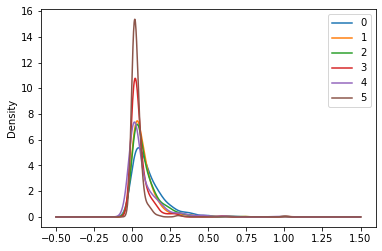

In [1037]:
#graph the data 
pd.DataFrame(customer2).plot(kind='kde');

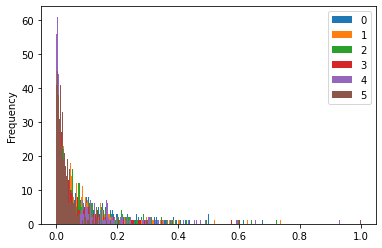

In [1038]:
pd.DataFrame(customer2).plot(kind='hist', bins=300);

#### Observation
Based on the data given, it is clear that the MinMaxScaler is better as the data is more defined using this method when comparing both the bar graphs. 

### Question to Answer 3: Find optimal number of features using RFECV and show the plot between Number of features selected vs Cross validation score (use channel as target variable)

#### Finding the optimal value using RFECV

In [1039]:
# import libaries 
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE


%matplotlib inline

In [1040]:
#reset the data and show it above (reason: we will need channel)
customer= pd.read_csv('C:/Users/Thivian Varna/Desktop/Juypternotebook files/Wholesale customers data.csv')
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [1041]:
#Drop region and show data
customer.drop(['Region'], axis=1, inplace=True)
customer.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [1042]:
#isolate the recurring data and channel
X = customer.drop(['Channel'], axis=1)
y = customer['Channel']

In [1043]:
# Recursive feature elimination
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=5, step=1) 
rfe.fit(X, y)

pd.Series(rfe.ranking_, index=customer.drop('Channel', axis=1).columns).sort_values(ascending=False).head(10)


Fresh               2
Milk                1
Grocery             1
Frozen              1
Detergents_Paper    1
Delicassen          1
dtype: int32

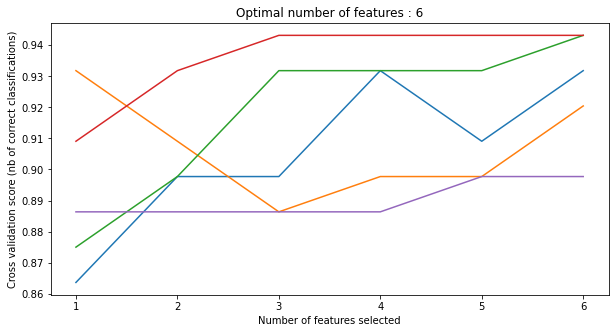

In [1044]:
#graph out the data for optimal features 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier(max_depth=7, random_state=1)
rfecv = RFECV(estimator=rf)
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

#### Observation
Based on the graph results, the number of optimal features is 6.

### Question to answer 4: Implement KMeans Clustering for K=2 to K=15 and based on elbow method identify what is the optimum number of clusters

Sources: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [1045]:
#import libaraies and reset data 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
customer= pd.read_csv('C:/Users/Thivian Varna/Desktop/Juypternotebook files/Wholesale customers data.csv')
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [1046]:
#Drop Region and Channel and show data 
customer.drop(['Region'], axis=1, inplace=True)
customer.drop(['Channel'], axis=1, inplace=True)
customer.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [1047]:
#scale the continous feature using the MixMaxScaler value above 
mms = MinMaxScaler()
mms.fit(customer2)
data_transformed = mms.transform(customer2)

In [1048]:
#initialise k-means and use the inertia attribute to identify
#the sum of squared distances of samples to the nearest cluster centre
Sum_of_squared_distances = []
K = range(2,14)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

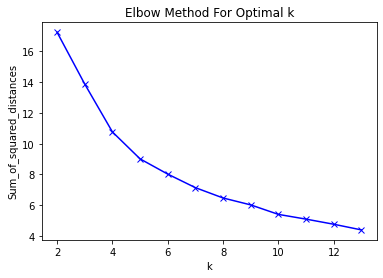

In [1049]:
#Plot the Elbow method For Optimal K
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Observation

The elbox is at k=5, therefore the optimal k for the dataset is 5 

### Question to answer 5: Implement PCA with number of original features to answer how much variance is explained by first 2 components and by first 4 components and visualize the clusters in the data

In [1050]:
#reset the data and show the data
customer= pd.read_csv('C:/Users/Thivian Varna/Desktop/Juypternotebook files/Wholesale customers data.csv')
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [1051]:
#Drop region and show the data 
customer.drop(['Region'], axis=1, inplace=True)
customer.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [1052]:
# Isolate the reoccuring categories and channel
X = customer.drop(['Channel'], axis=1)
y = customer['Channel']

In [1053]:
#apply standard scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(customer)
X_scaled = scaler.transform(customer)

In [1054]:
#perform standard train/split test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, customer.Channel, random_state=1)

In [1055]:
#Use the classifiers LinerarRegression and KNeighborsClassifier
from sklearn.linear_model import LinearRegression
(LinearRegression()
    .fit(X_train, y_train)
    .score(X_test, y_test))

1.0

In [1056]:
from sklearn.neighbors import KNeighborsClassifier
(KNeighborsClassifier()
    .fit(X_train, y_train)
    .score(X_test, y_test))

1.0

In [1057]:
#make the data into two dimensions 
customer.drop(columns=['Channel']).shape


(440, 6)

In [1058]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Original shape: %s" % str(X_scaled.shape))
print("Reduced shape: %s" % str(X_pca.shape))

Original shape: (440, 7)
Reduced shape: (440, 2)


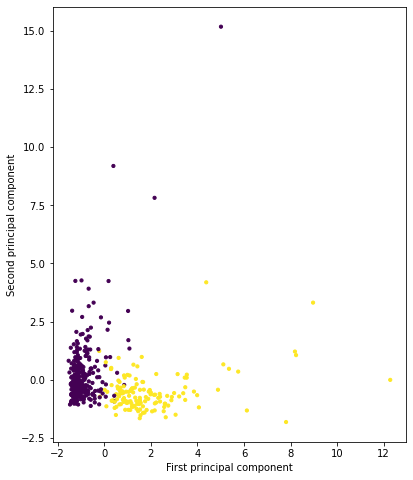

In [1059]:
# plot 1st vs 2nd principal component, color by class
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
            c=y, s=10)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

###### Implement the PCA Components

In [1060]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, random_state=1)

In [1061]:
(LinearRegression()
    .fit(X_train, y_train)
    .score(X_test, y_test))

0.5030767716700417

In [1062]:
(KNeighborsClassifier()
    .fit(X_train, y_train)
    .score(X_test, y_test))

0.9818181818181818

In [1063]:
print(pca.components_)

[[ 0.42811492 -0.02604983  0.47442437  0.53668271 -0.02997054  0.52437049
   0.16452831]
 [-0.20568566  0.51240279  0.2065736  -0.00717502  0.59470015 -0.11952397
   0.53334642]]


#### Observation
The principal components seems to be distinct from each other 

### Question to answer 7: Implement XGBoost Classifier with 5 Fold CV and report the performance metrics

Source Used:
https://www.youtube.com/watch?v=NUjlLx1Yu30
https://www.datacamp.com/tutorial/xgboost-in-python

In [1064]:
#implement the libaries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error

In [1065]:
#implement the data, drop region and show the data
customer= pd.read_csv('C:/Users/Thivian Varna/Desktop/Juypternotebook files/Wholesale customers data.csv')
customer.drop(['Region'], axis=1, inplace=True)
customer.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [1066]:
#seperate the variables
x = customer.drop(['Channel'], axis=1)
y = customer['Channel']

In [1067]:
#implement the XGboost and test data and standard train 
customer_data=xgb.DMatrix(data=X,label=y)

In [1068]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [1069]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [1070]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[15:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [1071]:
#compute the RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.451695


In [1072]:
#setup the dataframe
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=customer_data, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[15:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [1073]:
#show the performance matrix 
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.878227,0.009722,0.877258,0.043560
1,0.814172,0.011161,0.812649,0.042921
2,0.753832,0.015437,0.751371,0.035778
3,0.699499,0.015254,0.698435,0.033079
4,0.653720,0.017400,0.652240,0.028293


In [1074]:
#(optional) extract the final boosting round matrix 
print((cv_results["test-rmse-mean"]).tail(1))


49    0.293381
Name: test-rmse-mean, dtype: float64


#### Observation
The results of the performance matrix is above